<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/Images/SN_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


<h1>Extracting Stock Data Using a Python Library</h1>


A company's stock share is a piece of the company more precisely:
<p><b>A stock (also known as equity) is a security that represents the ownership of a fraction of a corporation. This
entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares." [1]</p></b>

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day the stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. 
<p>You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the <coode>yfinance</code> library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.</p>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Using yfinance to Extract Stock Info</li>
        <li>Using yfinance to Extract Historical Share Price Data</li>
        <li>Using yfinance to Extract Historical Dividends Data</li>
        <li>Exercise</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


In [1]:
!pip install yfinance==0.2.4 #pip install is the command you use to install python packages using the pip package managers
#!pip install pandas==1.3.3 #The exclamation mark (!) in Jupyter notebooks is used to run shell commands. This means that anything following the exclamation mark will be executed as if it were typed directly into the command line of your operating system

In [2]:
import yfinance as yf #imports the yfinance library
import pandas as pd #imports the pandas library

## Using the yfinance Library to Extract Stock Data


Using the `Ticker` module we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is Apple and the ticker symbol is `AAPL`.


In [3]:
apple = yf.Ticker("AAPL") 

#This creates an object using the Ticker module. A variable is like a sticky note with a name on it (‘x’) and we put that sticky note on whatever object the variable refers to.
#Ticker is a module that allows you to get market and other meta data for a specific security, in this case Apple
#A Python module is a file containing Python definitions and statements. A module can define functions, classes, and variables. A module can also include runnable code. Grouping related code into a module makes the code easier to understand and use. It also makes the code logically organized.

In [9]:
print(apple) #you can see here that we've created a Ticker object

yfinance.Ticker object <AAPL>


In [10]:
id(apple) #tells us where in the computer memory the object "apple" is stored. 

140452003778032

[this website has a simple explanation of variables v. objects](https://www.quora.com/In-Python-what-is-the-difference-between-an-object-and-a-variable-A-couple-of-examples-might-help)

Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.


In [13]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json

#wget is a computer program that retrieves content from webservers. On Mac, install homebrew:

#Copy and paste the following command in Terminal app:
#/bin/bash -c "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/HEAD/install.sh)"
#and press enter/return key. Wait for the command to finish. If you are prompted to enter a password, please type your Mac user's login password and press ENTER. Mind you, as you type your password, it won't 
#be visible on your Terminal (for security reasons), but rest assured it will work.

#to finally install wget, run the command: brew install wget
    

--2023-08-11 15:58:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5.6K) [application/json]
Saving to: ‘apple.json’

apple.json          100%[===================>]   5.57K  --.-KB/s    in 0s      

2023-08-11 15:58:49 (226 MB/s) - ‘apple.json’ saved [5699/5699]



### Stock Info


Using the attribute  <code>info</code> we can extract information about the stock as a Python dictionary.


In [15]:
import json #module in the standard python library used to work with json files.
with open('apple.json') as json_file: #use the json module to open our apple.json file that we got using the wget command as a json file called json_file. notice if you paste the above url into the browser, you get a json file.
    apple_info = json.load(json_file) #takes our file json_file and returns an object called apple_info, in our case a dictionary
    # Print the type of data variable    
    print("Type:", type(apple_info)) #confirm that what we are creating is a python dictionary
apple_info

Type: <class 'dict'>


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

We can get the <code>'country'</code> using the key country


In [18]:
apple_info['country']

#because apple_info is a dictionary, we can use the key "country" to pull the related value.


'United States'

### Extracting Share Price


A share is the single smallest part of a company's stock  that you can buy, the prices of these shares fluctuate over time. Using the <code>history()</code> method we can get the share price of the stock over a certain period of time. Using the `period` parameter we can set how far back from the present to get data. The options for `period` are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [20]:
apple_share_price_data = apple.history(period="max") #recall apple is our ticker object. we are using the history method on that object, and setting a time frame parameter.
type(apple_share_price_data) #to see what format our data will be in--a pandas dataframe

pandas.core.frame.DataFrame

The format that the data is returned in is a Pandas DataFrame. With the `Date` as the index the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day.


In [21]:
apple_share_price_data.head() #preview the first five rows of data. Note that there the date is the index (it is the first column)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` paramter to `True` so the change takes place to the DataFrame itself.


In [24]:
apple_share_price_data.reset_index(inplace=True) 

#setting the inplace parameter to true makes the change to the original dataframe. if you set the inplace parameter to false (the default) then a copy of the original df is made, the changes are made to the copy and the copy is returned.

#if you want to keep the original in its original state, you need to assign the copy to a new variable like so:

#new_df = df.sort_values('petal length (cm)' , ascending = True , inplace=False)
 
#new_df

#this will take the original dataframe, run the sort on a copy of the original, and then store the newly sorted copy as a new variable new_df. This means you'll have the original df and the new_df to work with

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10751,10751,2023-08-07 00:00:00-04:00,182.130005,183.130005,177.350006,178.850006,97576100,0.0,0.0
10752,10752,2023-08-08 00:00:00-04:00,179.690002,180.270004,177.580002,179.800003,67823000,0.0,0.0
10753,10753,2023-08-09 00:00:00-04:00,180.869995,180.929993,177.009995,178.190002,60378500,0.0,0.0
10754,10754,2023-08-10 00:00:00-04:00,179.479996,180.750000,177.600006,177.970001,54686900,0.0,0.0


In [23]:
apple_share_price_data.head() #notice now our original dataframe now has a new first column with a standard index starting at 0

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1,1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
2,1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
3,1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
4,1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


We can plot the `Open` price against the `Date`:


<Axes: xlabel='Date'>

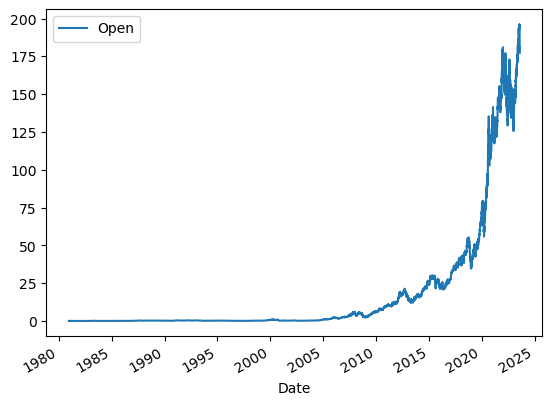

In [25]:
apple_share_price_data.plot(x="Date", y="Open") #uses the pandas plot function with the x axis set to date and y axis set to the opening price.

### Extracting Dividends


Dividends are the distribution of a companys profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable `dividends` we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.


In [41]:
apple.dividends #uses the dividends function to pull the date and dividends for our variable/object of apple that we created for the ticker module



Date
1987-05-11 00:00:00-04:00    0.000536
1987-08-10 00:00:00-04:00    0.000536
1987-11-17 00:00:00-05:00    0.000714
1988-02-12 00:00:00-05:00    0.000714
1988-05-16 00:00:00-04:00    0.000714
                               ...   
2022-05-06 00:00:00-04:00    0.230000
2022-08-05 00:00:00-04:00    0.230000
2022-11-04 00:00:00-04:00    0.230000
2023-02-10 00:00:00-05:00    0.230000
2023-05-12 00:00:00-04:00    0.240000
Name: Dividends, Length: 79, dtype: float64

In [42]:
type(apple.dividends) #you can see from this code that this returned a panda series (not a dataframe like the notes mention)

pandas.core.series.Series

In [44]:
#running this code below converts the series into a dataframe

df = pd.DataFrame(apple.dividends)

df.reset_index(inplace = True)
df.head()

,Date,Dividends
0,1987-05-11 00:00:00-04:00,0.000536
1,1987-08-10 00:00:00-04:00,0.000536
2,1987-11-17 00:00:00-05:00,0.000714
3,1988-02-12 00:00:00-05:00,0.000714
4,1988-05-16 00:00:00-04:00,0.000714


We can plot the dividends overtime:


<Axes: xlabel='Date'>

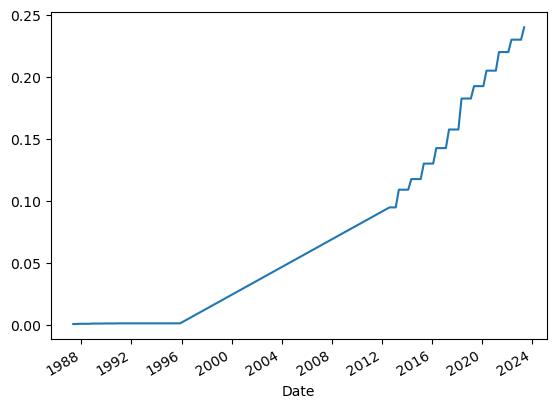

In [45]:
apple.dividends.plot()

<Axes: xlabel='Date'>

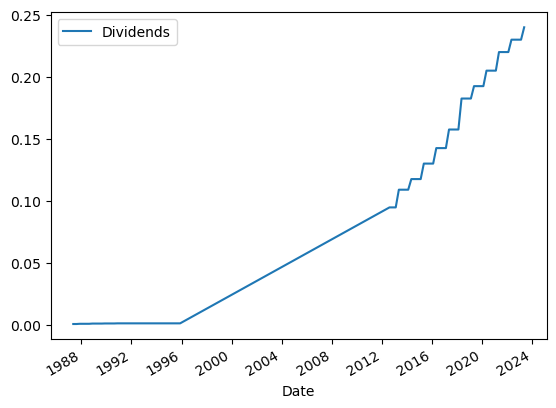

In [48]:
#plotting using the dataframe I made:

df.plot(x = 'Date', y= 'Dividends')

## Exercise 


Now using the `Ticker` module create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object <code>amd</code>.


In [51]:
amd = yf.Ticker("AMD")
amd #you can see we've created our ticker object AMD

yfinance.Ticker object <AMD>

In [52]:
#use wget program to pull in the json file for amd

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json

--2023-08-11 16:42:04--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5.7K) [application/json]
Saving to: ‘amd.json’

amd.json            100%[===================>]   5.70K  --.-KB/s    in 0s      

2023-08-11 16:42:06 (253 MB/s) - ‘amd.json’ saved [5838/5838]



In [55]:
import json #import the json library
with open('amd.json') as json_file: #open our newly acquired amd.json file (a joson file) and name it json_file
    amd_info = json.load(json_file) #load our json file into a python ojbect, in our case a python dictionary
    # Print the type of data variable    
    print("Type:", type(amd_info))
amd_info

Type: <class 'dict'>


{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

<b>Question 1</b> Use the key  <code>'country'</code> to find the country the stock belongs to, remember it as it will be a quiz question.


In [58]:
amd_info["country"]

'United States'

<b>Question 2</b> Use the key  <code>'sector'</code> to find the sector the stock belongs to, remember it as it will be a quiz question.


In [59]:
amd_info["sector"]

'Technology'

<b>Question 3</b> Obtain stock data for AMD using the `history` function, set the `period` to max. Find the `Volume` traded on the first day (first row).


In [69]:
amd_share_price_data = amd.history(period="max")
amd_share_price_data.reset_index(inplace=True)
amd_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1980-03-17 00:00:00-05:00,0.0,3.302083,3.125000,3.145833,219600,0.0,0.0
1,1980-03-18 00:00:00-05:00,0.0,3.125000,2.937500,3.031250,727200,0.0,0.0
2,1980-03-19 00:00:00-05:00,0.0,3.083333,3.020833,3.041667,295200,0.0,0.0
3,1980-03-20 00:00:00-05:00,0.0,3.062500,3.010417,3.010417,159600,0.0,0.0
4,1980-03-21 00:00:00-05:00,0.0,3.020833,2.906250,2.916667,130800,0.0,0.0


In [73]:
print("volume traded first day:" , amd_share_price_data.iloc[0,5])

volume traded first day: 219600


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
